# Figure 3 and Figure 4

In [1]:
%pylab inline 
from numpy import *

import sys
sys.path.append('../utils')
from eigenvalues import *
from plot import *

Populating the interactive namespace from numpy and matplotlib


## Figure 3: robust optimum requires that neither layer dominates.

In [3]:
def make_fig_3():
    deltas = linspace(-1,1,50)#50
    chis = linspace(0.,1,31)#17
    omegas = logspace(1,3,5)#9
    plot_chis1 = arange(len(chis))[::6] #[i*4 for i in range(len(chis))]
    plot_chis2 = plot_chis1
    network_name1 = 'SimpleNetwork'
    network_name2 = 'Krackhardt-High-Tech'

    fig,ax = subplots(2,2,figsize=(7,6),constrained_layout=True)
    
    plot_lambda2_vs_delta_chis(network_name1,deltas,chis,plot_chis1,ax[0,0])
    plot_lambda2_vs_delta_chis(network_name2,deltas,chis,plot_chis2,ax[0,1])
    
    chi_star1 = plot_dlambda2_ddelta(network_name1,omegas,deltas,chis,ax[1,0])
    chi_star2 = plot_dlambda2_ddelta(network_name2,omegas,deltas,chis,ax[1,1])

    ax[1,0].set_ylabel('$d\overline{\lambda}_2/d \delta$')
    ax[1,1].legend(['$\omega = '+str(int(w))+'$' for w in omegas],bbox_to_anchor=(1, 1.05))
    ax[0,0].set_ylabel('convergence rate, $Re(\overline{\lambda}_2)$')
    ax[0,1].legend(['$\chi = ' + str(chis[s])[:4] + '$' for s in plot_chis1],bbox_to_anchor=(1, 1.05))

    ax[0,0].text(-2., 1.6, '(A)',fontsize=14)
    ax[1,0].text(-.5, 1.6, '(B)',fontsize=14)
    
    print(chi_star1)
    print(chi_star2)

(0.13333333333333333, 0.7)
(0.06666666666666667, 0.8)


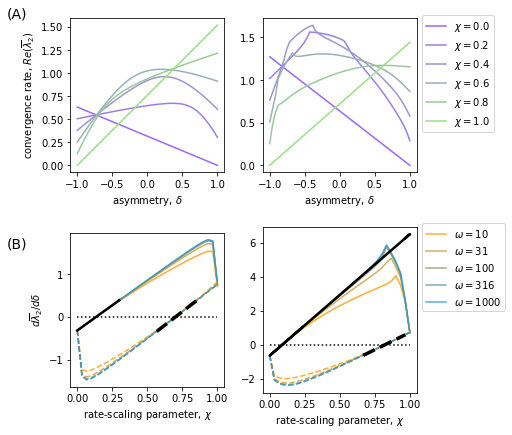

In [4]:
make_fig_3()

savefig('figs/figure3.pdf')

## Figure 4(A): depiction of Re($\lambda_2$) for the ($\delta, \chi$) parameter space.

In [5]:
def make_fig_4A():
    network_name1 = 'SimpleNetwork'
    network_name2 = 'Krackhardt-High-Tech'
    omegas = logspace(1,3,9) # a bunch of coupling strengths
    deltas = linspace(-1,1,200) # a bunch of asymmetry parameter
    chis = linspace(0.01,.99,160) # a bunch of rate-scaling parameter
    
    optima_delta1 = get_optima(network_name1,omegas,deltas,chis)
    optima_delta2 = get_optima(network_name2,omegas,deltas,chis)
    
    fig,ax = subplots(1,2,figsize=(7,4.5),constrained_layout=True)
    
    plot_contour(network_name1,deltas,chis,ax[0])
    ax[0].plot(chis,optima_delta1,'--w',linewidth=2)
    ax[0].plot([0,1],[0,0],':k')
    
    im = plot_contour(network_name2,deltas,chis,ax[1])
    ax[1].plot(chis,optima_delta2,'--w',linewidth=2)
    ax[1].plot([0,1],[0,0],':k')

    cbar = fig.colorbar(im, ax=ax[:], shrink=.5,location='right')
    cbar.set_label('convergence rate, $Re(\overline{{\lambda}}_2)$', rotation=270,labelpad=16)

    ax[0].set_ylabel('asymmetry, $\delta$')
    ax[0].text(-.4, 1., '(A)',fontsize=14)
    return fig,ax

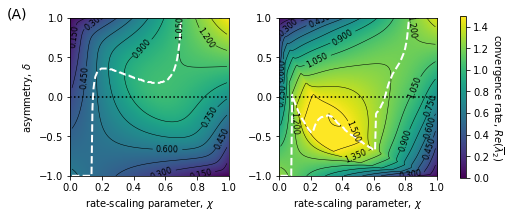

In [6]:
make_fig_4A()

savefig('figs/figure4A.pdf')

## Figure 4(B): the convergence rate of individual layers

In [7]:
def make_fig_4B():
    network_name1 = 'SimpleNetwork'
    network_name2 = 'Krackhardt-High-Tech'
    chis = linspace(0.01,.99,60)
    
    fig,ax = subplots(1,2,figsize=(8,1.2))

    plot_Leval2_eachlayer(network_name1,chis,ax[0])
    plot_Leval2_eachlayer(network_name2,chis,ax[1])

    ax[0].set_ylabel('conv. rate')
#    ax[0].set_ylabel('$Re({{\lambda}}_2 )$')
    plt.legend(['layer 1: $\chi Re(\lambda_2^{(1)})$','layer 2: $(1-\chi)Re(\lambda_2^{(2)})$'],
                   loc = 'lower center',
                   ncol = 2,
                   bbox_to_anchor=(-.1, -1),
                  )
    ax[1].text(-1.75, 1.5, '(B)',fontsize=14)
    return fig,ax

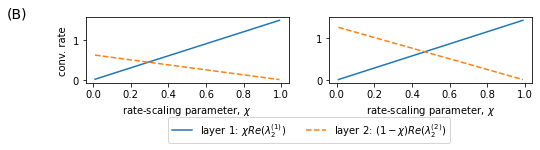

In [8]:
make_fig_4B()
savefig('figs/figure4B.pdf')